In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('customer.csv')

In [4]:
data

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,...,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.5,Yox,Hə Hə
7039,2234-XADUH,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,...,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.9,Yox,Hə Hə
7040,4801-JZAZL,Qadın,0,Hə,Hə,11,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,Yox,Yox Hə
7041,8361-LTMKD,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.6,Hə,Hə Hə


In [25]:
data["cinsiyyət"].value_counts()

cinsiyyət
 1    3508
 0    3435
-1     100
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 7043 non-null   object 
 1   cinsiyyət                          6943 non-null   object 
 2   Yaşlı təbəqə                       7043 non-null   int64  
 3   tərəfdaş                           6943 non-null   object 
 4   asılı olanlar                      7043 non-null   object 
 5   müddəti                            7043 non-null   int64  
 6   Telefon Xidməti                    7043 non-null   object 
 7   Birdən çox xətt                    7043 non-null   object 
 8   İnternet servisi                   7043 non-null   object 
 9   onlayn təhlükəsizlik               7043 non-null   object 
 10  onlayn yedəkləmə                   7043 non-null   object 
 11  Cihazın Mühafizəsi                 7043 non-null   objec

In [6]:
data.describe()

,Yaşlı təbəqə,müddəti,Aylıq Ödənişlər
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data.loc[data.Churn == "Yox", "Churn"] = 0 #not churn
data.loc[data.Churn == "Hə", "Churn"] = 1 #churn customers

In [11]:
data.head()

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,0,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,0,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,1,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,0,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,1,Hə Hə


In [12]:
data["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

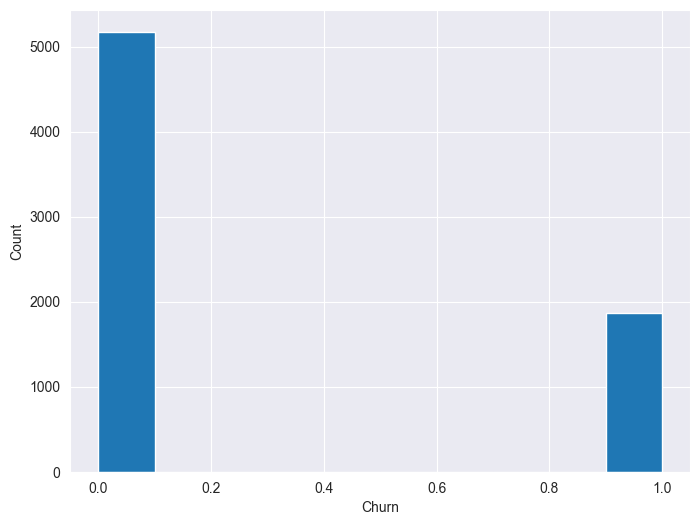

In [16]:
plt.figure(figsize = (8,6))
plt.hist(data["Churn"])
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [17]:
data_copy = pd.read_csv('customer.csv')

In [20]:
categ_cols=data.dtypes.pipe(lambda x : x [x=="object"]).index

for c in categ_cols:
    data[c], _ =pd.factorize(data[c])
data.head()

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,29.85,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,0,0,0,1,1,1,56.95,1,0,1
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,1,53.85,2,1,2
3,3,1,0,1,0,45,0,0,0,1,...,1,0,0,1,1,2,42.30,3,0,3
4,4,-1,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,70.70,4,1,2


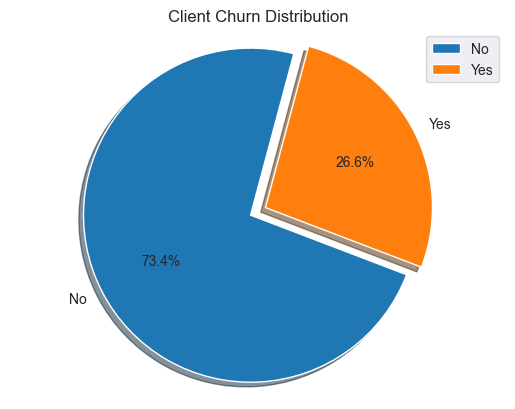

In [21]:
sizes=[5174,1879]
labels="No","Yes"
explode=(0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',labels=labels, shadow=True, startangle=75)
ax1.axis('equal')
ax1.set_title("Client Churn Distribution")
ax1.legend(labels)
plt.show()


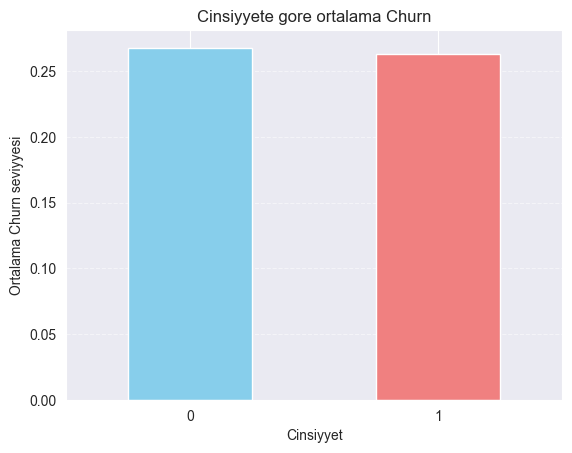

In [26]:
data_clean = data[data["cinsiyyət"] != -1]

churn_means= data_clean.groupby("cinsiyyət")["Churn"].mean()
#Bar plot
churn_means.plot(kind="bar", color=["skyblue","lightcoral"])

plt.title("Cinsiyyete gore ortalama Churn")
plt.xlabel("Cinsiyyet")
plt.ylabel("Ortalama Churn seviyyesi")
plt.xticks(rotation=0)
plt.grid(axis="y",linestyle="--",alpha=0.5)
plt.show()

In [28]:
data_copy.columns

Index(['id', 'cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'müddəti', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'TelefonXidməti,KağızsızHesablaşma'],
      dtype='object')

In [29]:
data_copy

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,...,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.5,Yox,Hə Hə
7039,2234-XADUH,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,...,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.9,Yox,Hə Hə
7040,4801-JZAZL,Qadın,0,Hə,Hə,11,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,Yox,Yox Hə
7041,8361-LTMKD,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.6,Hə,Hə Hə


In [30]:

cat_cols = [col for col in data_copy.columns if data_copy[col].nunique() <= 10 and col != 'Churn']
print(cat_cols)


['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi', 'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi', 'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə', 'Kağızsız Hesablaşma', 'ödəniş metodu', 'TelefonXidməti,KağızsızHesablaşma']


In [32]:
data_copy["TelefonXidməti,KağızsızHesablaşma"].value_counts()

TelefonXidməti,KağızsızHesablaşma
Hə Hə      3784
Hə Yox     2577
Yox Hə      387
Yox Yox     295
Name: count, dtype: int64

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


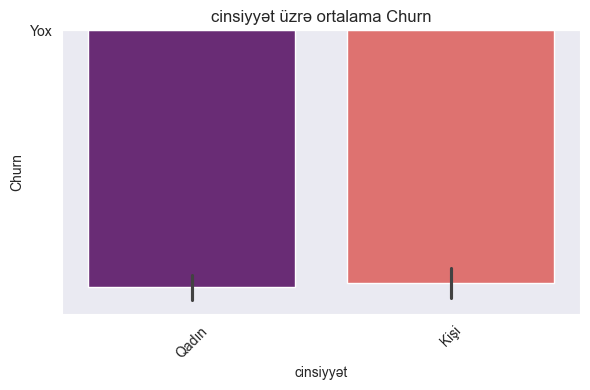

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


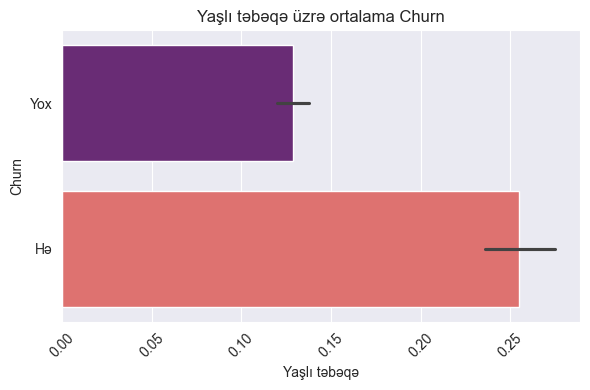

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


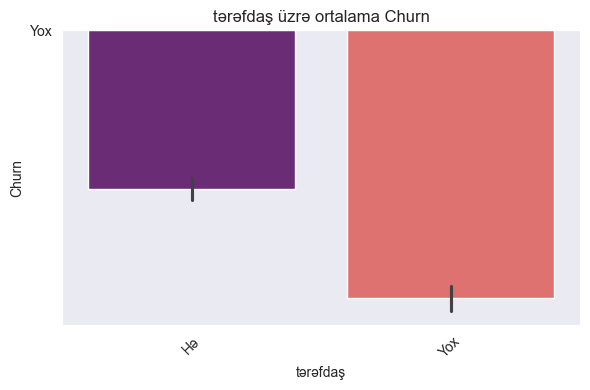

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


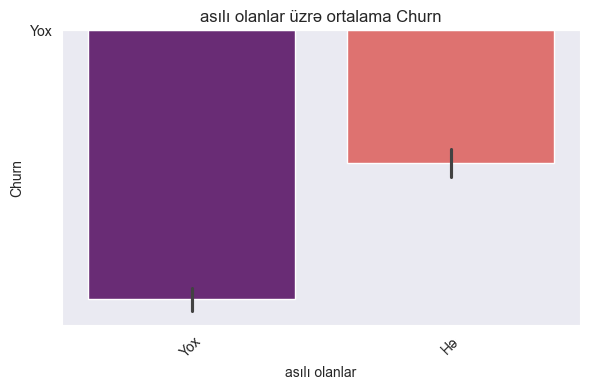

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


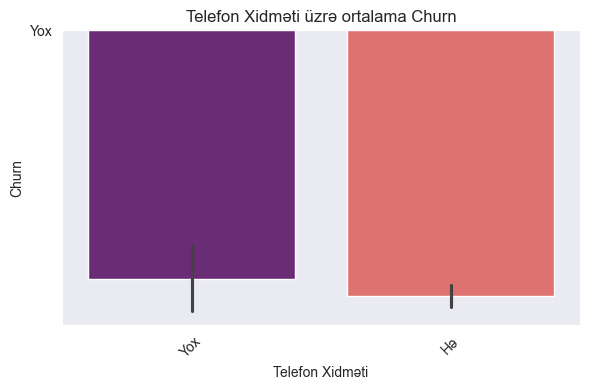

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


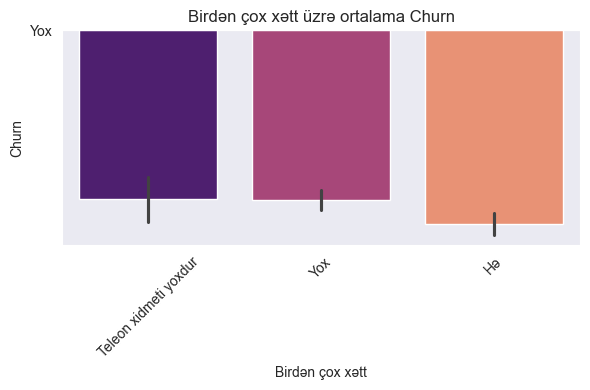

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


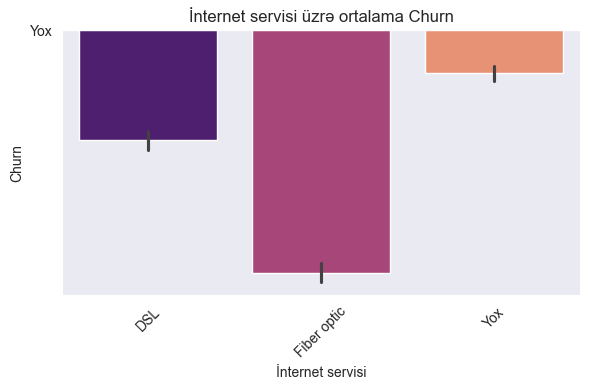

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


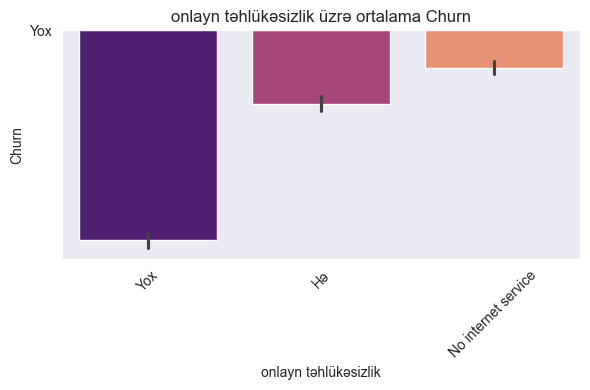

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


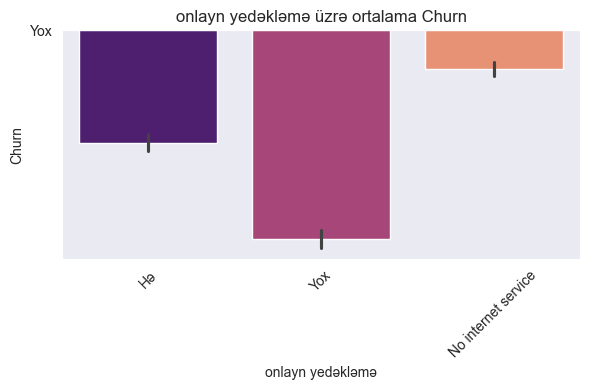

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


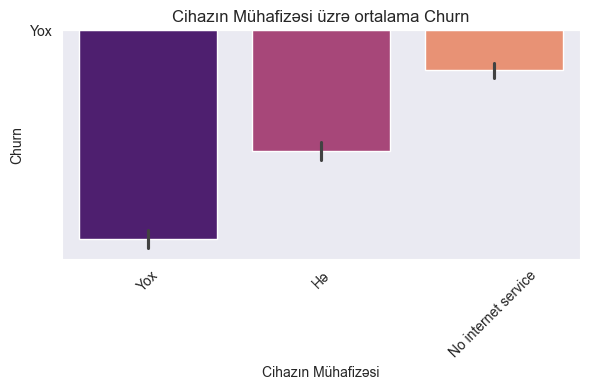

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


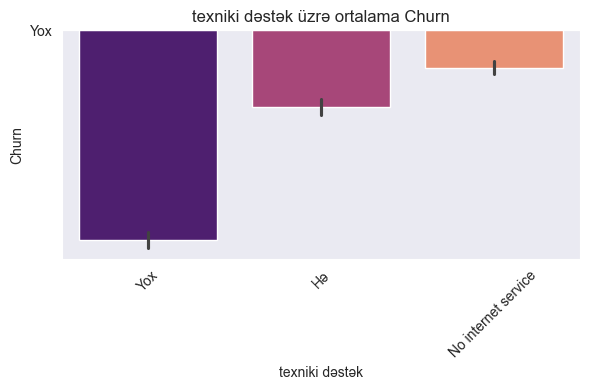

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


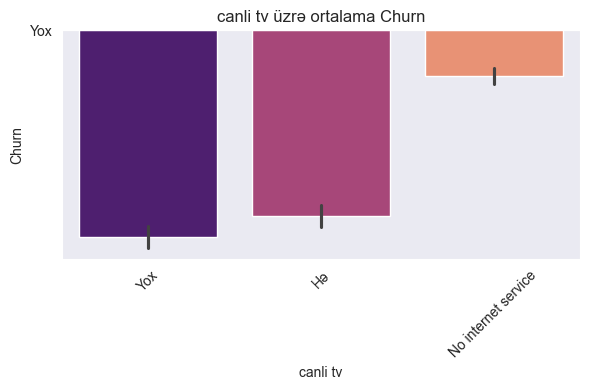

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


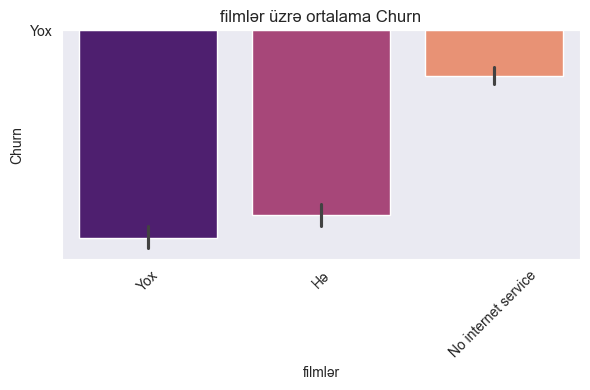

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


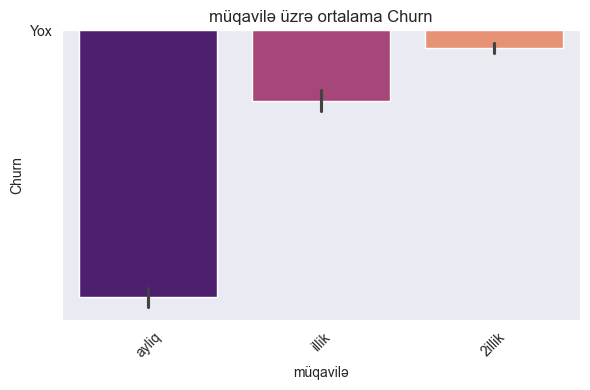

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


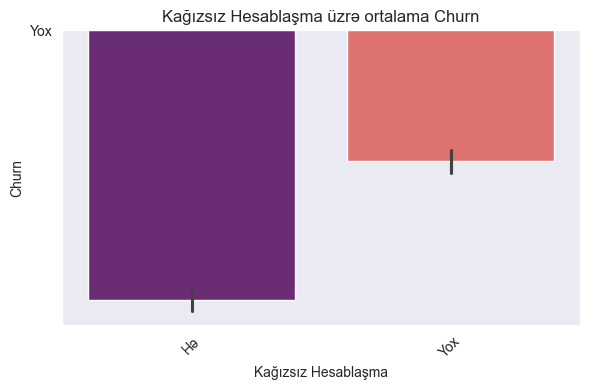

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


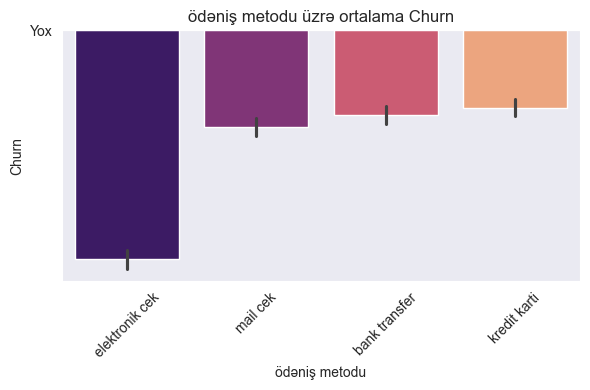

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_1172/1677039422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


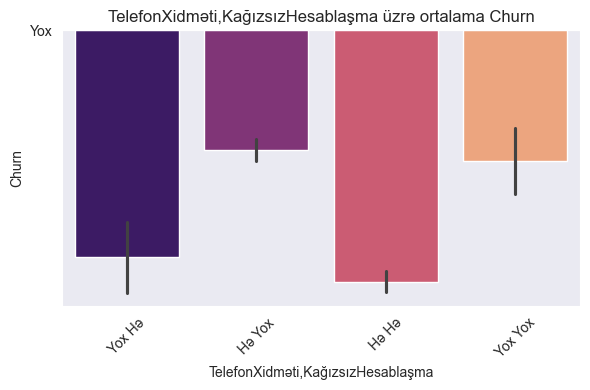

In [31]:

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')
    plt.title(f"{col} üzrə ortalama Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


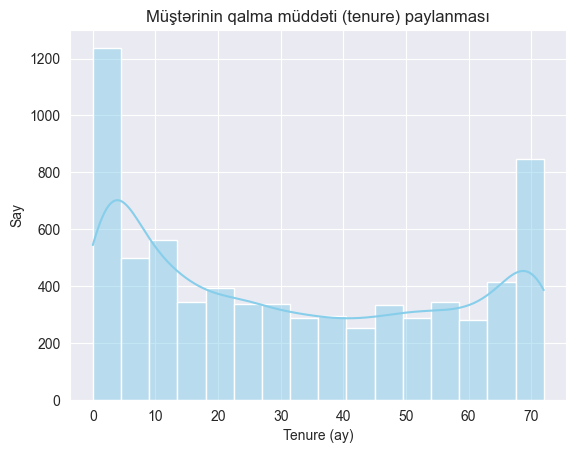

In [37]:
sns.histplot(data=data_copy, x="müddəti", kde=True, color="skyblue")
plt.title("Müştərinin qalma müddəti (tenure) paylanması")
plt.xlabel("Tenure (ay)")
plt.ylabel("Say")
plt.show()

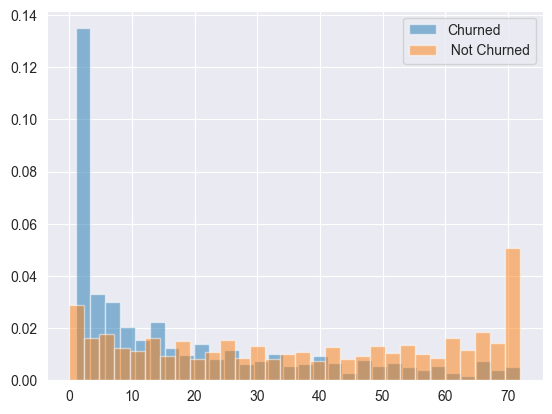

In [39]:
bins =30
plt.hist(data_copy[data_copy.Churn == "Hə"].müddəti,
         bins, alpha=0.5, density=True,label="Churned")
plt.hist(data_copy[data_copy.Churn == "Yox"].müddəti,
         bins, alpha=0.5, density=True,label=" Not Churned")
plt.legend(loc="upper right")
plt.show()


In [40]:

def show_correlation(data, method='pearson'):

    corr = data.corr(method=method)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
    plt.title(f"{method.capitalize()} Korrelasiya Matrisi")
    plt.show()


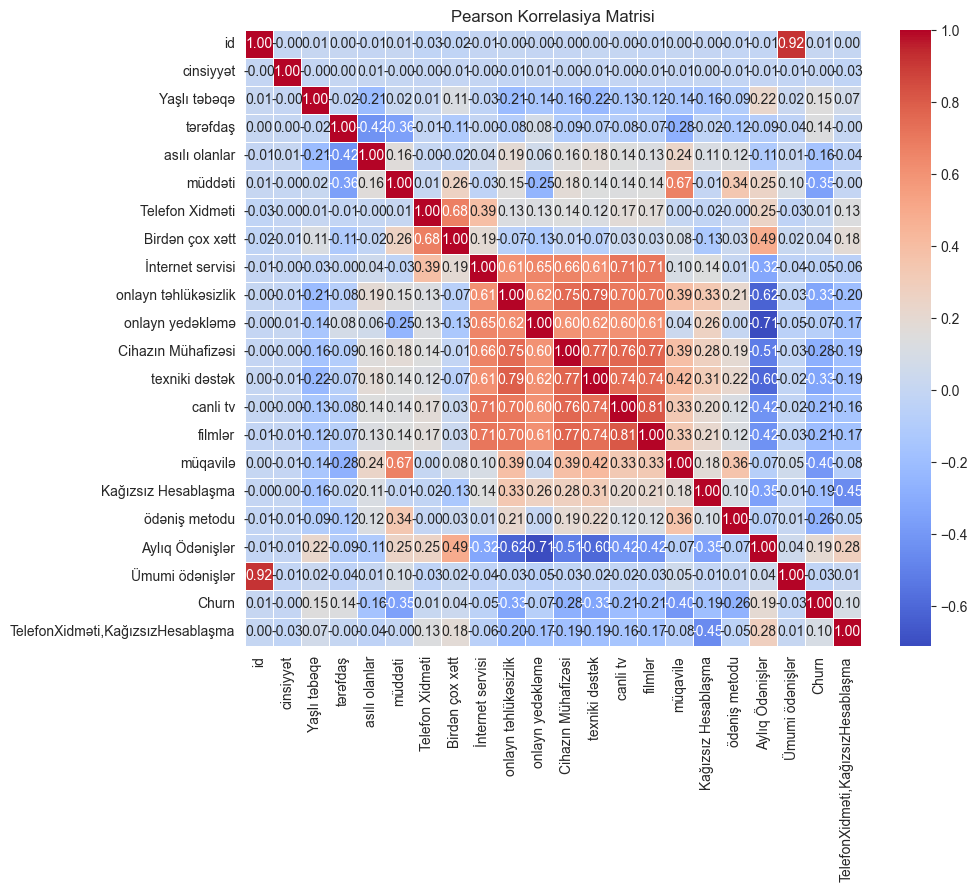

In [41]:
show_correlation(data)


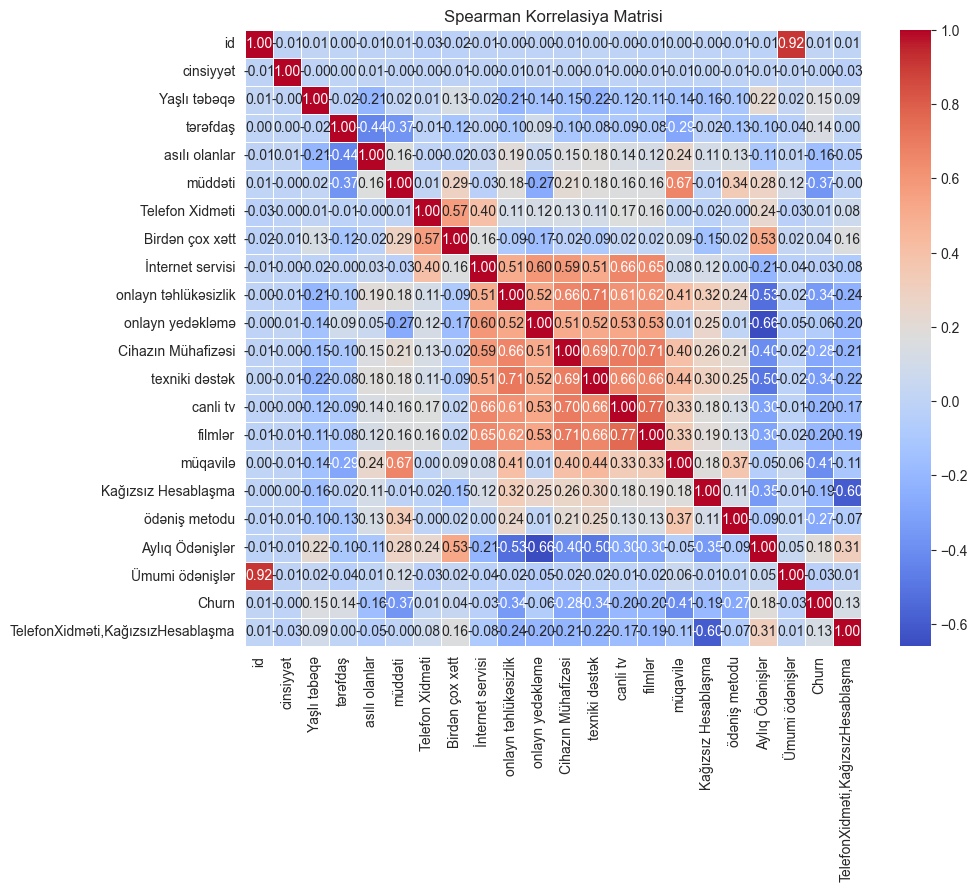

In [42]:
show_correlation(data, method='spearman')